In [1]:
# %%
import os
import sys
from pathlib import Path
import numpy as np
from tqdm.notebook import tqdm

# Add the src directory to the sys.path if needed
sys.path.append(os.path.abspath('..'))

# Import functions and constants from train_utils
from secret_runway_detection.train_utils import (
    add_buffer_to_label,
)


In [4]:
BUFFER_TYPES = ['cross', 'ball', 'square']

TRAINING_DATA_DIR = Path('../training_data_192')
POINT_DATA_DIR = TRAINING_DATA_DIR / 'training_data_point'

In [3]:
point_image_dir = TRAINING_DATA_DIR / 'images'

In [4]:
import logging
import shutil

for buffer_type in tqdm(BUFFER_TYPES, desc='Buffer Types'):
    buffer_dir = TRAINING_DATA_DIR / f'training_data_{buffer_type}'
    buffer_dir.mkdir(exist_ok=True)
    
    # Copy over POINT_DATA_DIR / 'images' to buffer_dir / 'images'
    (buffer_dir / 'images').mkdir(exist_ok=True)
    source_images_dir = POINT_DATA_DIR / 'images'
    destination_images_dir = buffer_dir / 'images'
    for file in source_images_dir.iterdir():
        if file.is_file():
            shutil.copy2(file, destination_images_dir / file.name)

    # Run add_buffer_to_label on each .npy label file and save to buffer_dir / 'labels'
    (buffer_dir / 'labels').mkdir(exist_ok=True)
    source_labels_dir = POINT_DATA_DIR / 'labels'
    destination_labels_dir = buffer_dir / 'labels'
    for file in tqdm(source_labels_dir.iterdir(), desc='Label Files'):
        if file.is_file() and file.suffix == '.npy':
            label = np.load(file)
            buffer_label = add_buffer_to_label(label, num_buffer_tiles=20, buffer_type=buffer_type)
            np.save(destination_labels_dir / file.name, buffer_label)



Buffer Types:   0%|          | 0/3 [00:00<?, ?it/s]

Label Files: 0it [00:00, ?it/s]

Label Files: 0it [00:00, ?it/s]

Label Files: 0it [00:00, ?it/s]

In [5]:
import shutil
from pathlib import Path

# Define your buffer types and training data directory
TRAINING_DATA_DIR = Path('../training_data_192')  # Replace with your directory path

for buffer_type in BUFFER_TYPES + ['point']:
    buffer_dir = TRAINING_DATA_DIR / f'training_data_{buffer_type}'
    zip_file = TRAINING_DATA_DIR / f'training_data_{buffer_type}.zip'
    
    if buffer_dir.is_dir():
        shutil.make_archive(zip_file.with_suffix(''), 'zip', buffer_dir)
        print(f"Zipped {buffer_dir} to {zip_file}")
    else:
        print(f"Directory {buffer_dir} does not exist.")

Zipped ../training_data_192/training_data_cross to ../training_data_192/training_data_cross.zip
Zipped ../training_data_192/training_data_ball to ../training_data_192/training_data_ball.zip
Zipped ../training_data_192/training_data_square to ../training_data_192/training_data_square.zip
Zipped ../training_data_192/training_data_point to ../training_data_192/training_data_point.zip


Buffer Type: cross, shape: (3, 192, 192), label shape: (192, 192)


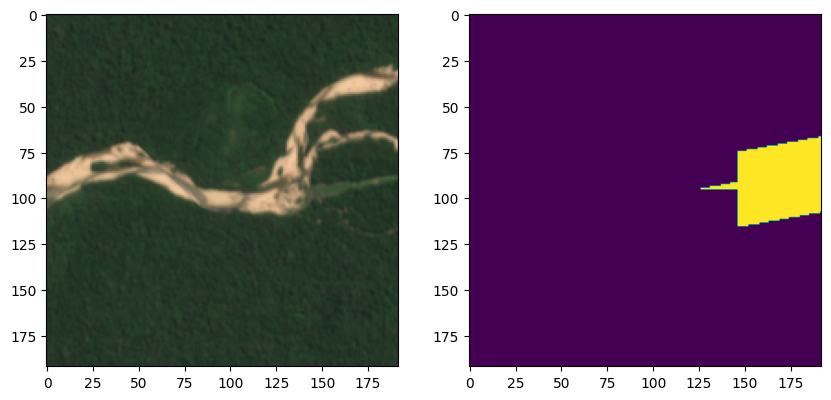

Buffer Type: ball, shape: (3, 192, 192), label shape: (192, 192)


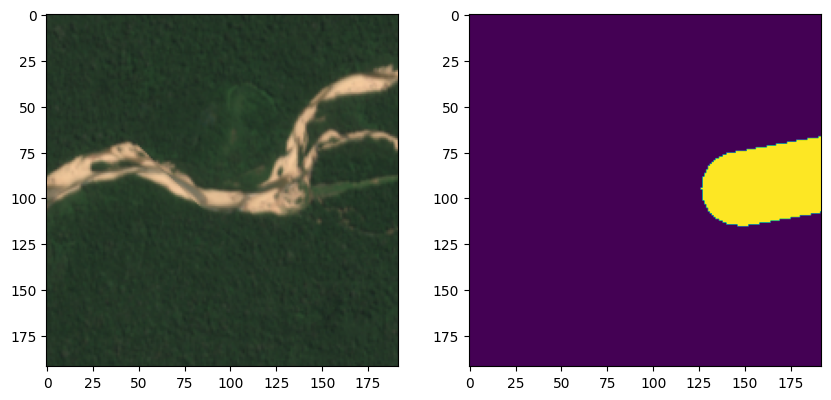

Buffer Type: square, shape: (3, 192, 192), label shape: (192, 192)


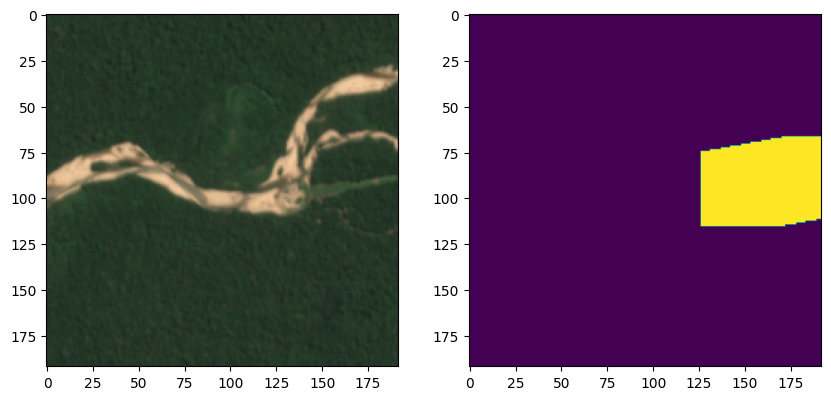

Buffer Type: point, shape: (3, 192, 192), label shape: (192, 192)


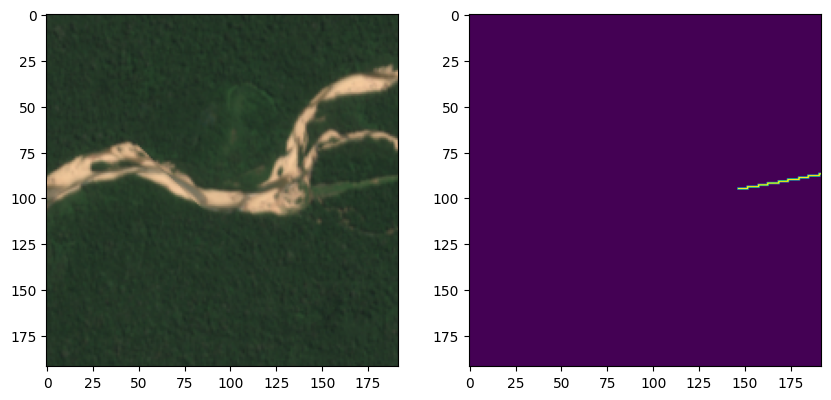

In [6]:
# load some random files of the buffered data to check that size is same

import matplotlib.pyplot as plt

for buffer_type in BUFFER_TYPES + ['point']:
    buffer_dir = TRAINING_DATA_DIR / f'training_data_{buffer_type}'
    buffer_images_dir = buffer_dir / 'images'
    buffer_labels_dir = buffer_dir / 'labels'

    # Pick the file area_3_of_strip_1.npy
    image = np.load(buffer_images_dir / f'area_3_of_strip_1.npy')
    label = np.load(buffer_labels_dir / f'area_3_of_strip_1.npy')
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image.transpose(1, 2, 0))
    ax[1].imshow(label)

    print(f'Buffer Type: {buffer_type}, shape: {image.shape}, label shape: {label.shape}')
    plt.show()